# Visualization


## Matplotlib


In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


### Two interfaces


### Matlab style interface

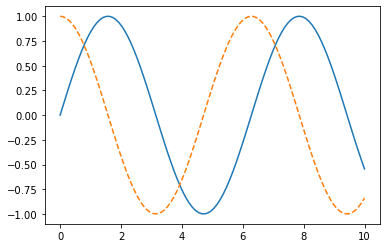

In [3]:
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

Adding decorations to the plot.

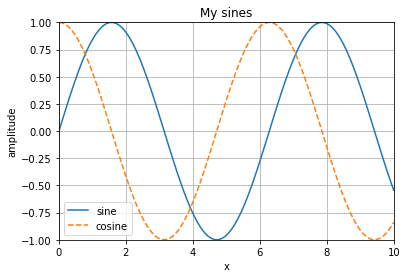

In [4]:
plt.plot(x, np.sin(x), '-', label='sine')
plt.plot(x, np.cos(x), '--', label='cosine')

plt.xlim([0, 10])
plt.ylim([-1, 1])
plt.xlabel('x')
plt.ylabel('amplitude')
plt.title('My sines')
plt.grid()
plt.legend();

### Object oriented interface 

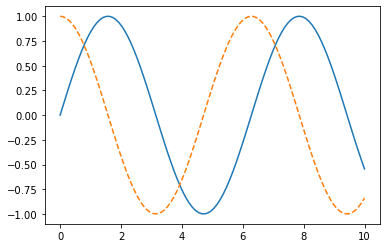

In [5]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-')
ax.plot(x, np.cos(x), '--');

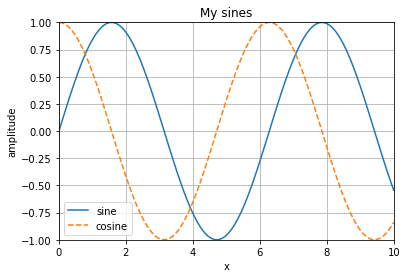

In [6]:
fig = plt.figure()
ax = plt.axes()
ax.plot(x, np.sin(x), '-', label='sine')
ax.plot(x, np.cos(x), '--', label ='cosine')

ax.set(xlim=[0, 10], ylim=[-1, 1],
       xlabel='x', ylabel='amplitude',
       title='My sines');
ax.grid()
ax.legend();

### Save to file 
With the figure object at hand, we can save to file

In [7]:
fig.savefig('sines.pdf')

## Plotting with pandas

In [8]:
col_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
data = pd.read_fwf("auto-mpg.data", header=None, names = col_names, na_values='?')

Plotting all columns, works, but does not provide a lot of insight.

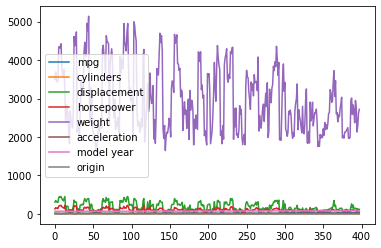

In [9]:
data.plot();

Let's look at the mpg distribution (a histogram)

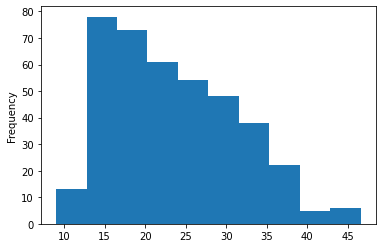

In [10]:
data['mpg'].plot.hist();

In [11]:
data.origin.value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

Do we have similar mpg in origins?  
Plotting two histograms for each origin side beside directly form the dataframe:

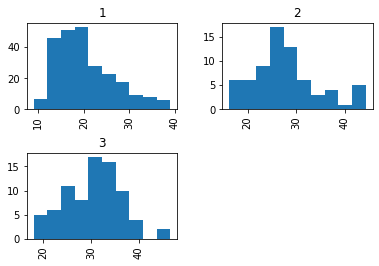

In [12]:
axs = data.hist(column='mpg', by='origin')

To format this plot, we can work on the axes (array) that is returned by the plot call. We use Matplotlib object oriented interface methods to do this

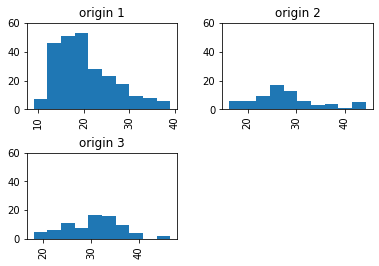

In [13]:
axs = data.hist(column='mpg', by='origin')
axs[0, 0].set(title='origin 1', ylim=[0, 60])
axs[0, 1].set(title='origin 2', ylim=[0, 60])
axs[1, 0].set(title='origin 3', ylim=[0, 60]);

Is age and blood pressure correlated? Maybe it is different for females and males?  
Let's have a look with a scatter plot.

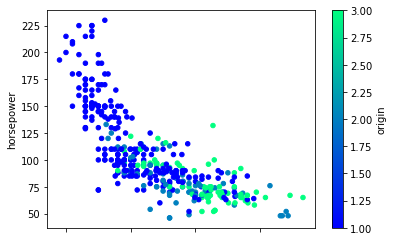

In [14]:
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='winter');

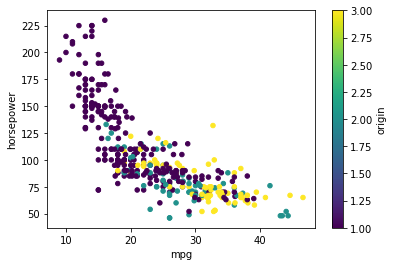

In [15]:
fig, ax = plt.subplots()
data.plot.scatter('mpg', 'horsepower', c='origin', colormap='viridis', ax=ax);

It is a bit annoying that there is a colorbar, we know gender is categorical.

One way to avoid the colorbar is to loop over the categories and assign colors based on the category.

See:
https://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib

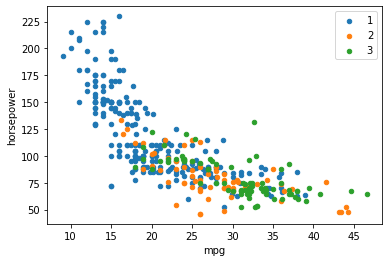

In [16]:
colors = {1: 'tab:blue', 2: 'tab:orange', 3: 'tab:green'}
fig, ax = plt.subplots()
for key, group in data.groupby(by='origin'):
    group.plot.scatter('mpg', 'horsepower', c=colors[key], label=key, ax=ax);

.## Seaborn 
>Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

http://seaborn.pydata.org/index.html

Seaborn is usually imported as `sns`

In [17]:
import seaborn as sns

Let's re-create the histograms by origin

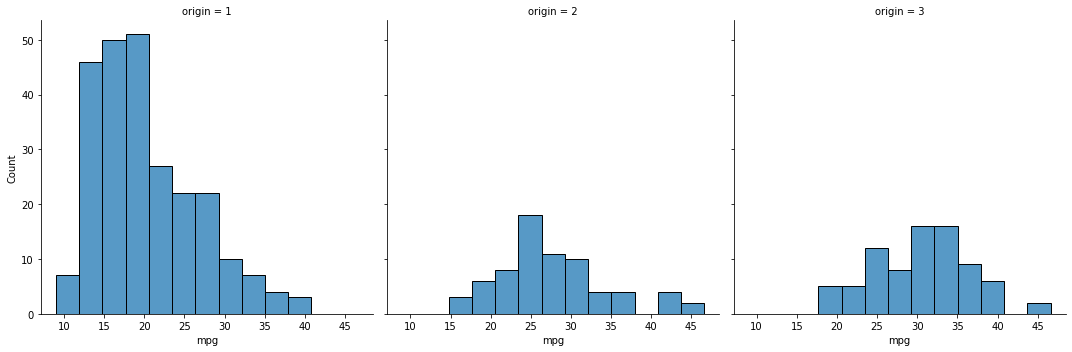

In [18]:
# Use gender to split age into columns
sns.displot(x='mpg', col='origin', data=data);

We can display the counts in the same plot, one on top of the other.

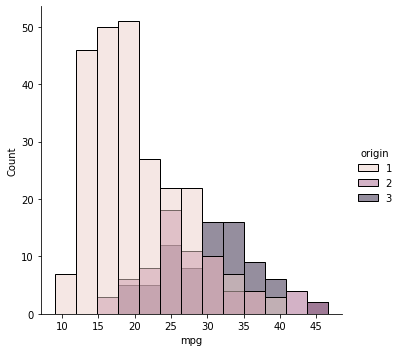

In [19]:
# Use gender to color (hue) in the same plot
sns.displot(x='mpg', hue='origin', data=data);

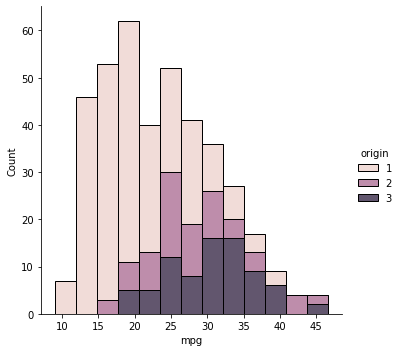

In [20]:
sns.displot(x='mpg', hue='origin', data=data, multiple='stack');

We can look at the differences in mpg's with a boxplot too

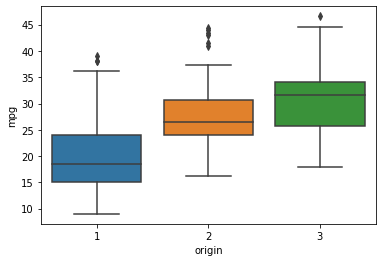

In [24]:
sns.boxplot(x='origin', y='mpg', data=data);

In [23]:
data['origin_str'] = data['origin'].replace([1, 2, 3], ['origin1', 'origin2', 'origin3'])

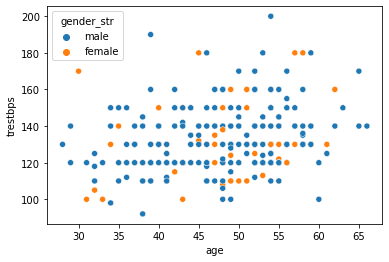

In [23]:
ax = sns.scatterplot(x='mpg', y='horsepower', data=data, hue='origin_str')

Adding a regression line helps with visualizing the relationship

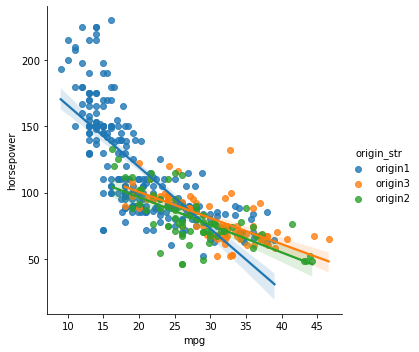

In [25]:
ax = sns.lmplot(x='mpg', y='horsepower', data=data, hue='origin_str')

Maybe there are other correlations in the data set. Pairplot is a great way to get an overview

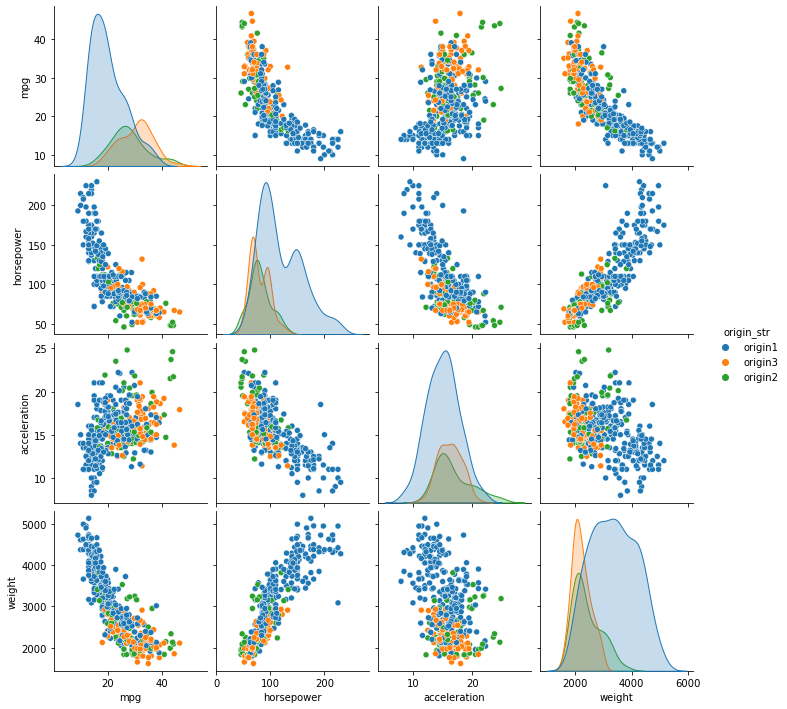

In [26]:
sns.pairplot(data, vars=['mpg', 'horsepower', 'acceleration', 'weight'], hue='origin_str');

As an alternative, we can visualize the correlation matrix as a heatmap

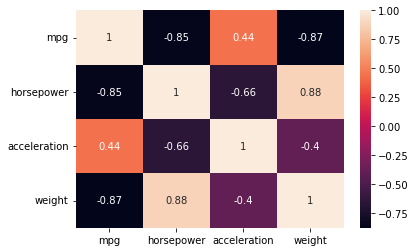

In [27]:
g = sns.heatmap(data[['mpg', 'horsepower', 'acceleration', 'weight']].corr(method='spearman'), 
            annot=True)